In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn. tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

In [3]:
cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','IBM','DiabetesPedigreeFunction','Age','Outcome']

In [4]:
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'IBM',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [5]:
df=pd.read_csv(url,names=cols)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,IBM,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]


In [10]:
from sklearn.model_selection import train_test_split
X_Train, X_Test , y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42) 

In [12]:
dt_clf = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 3, random_state = 42)
dt_clf.fit(X_Train , y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [13]:
rf_clf = RandomForestClassifier(n_estimators = 100 , random_state = 42) 
rf_clf.fit(X_Train , y_train) 

RandomForestClassifier(random_state=42)

In [14]:
print("Decision Tree - training accuracy:", dt_clf.score(X_Train , y_train))

Decision Tree - training accuracy: 0.7752442996742671


In [15]:
print("Decision Tree - testing accuracy:", dt_clf.score(X_Test , y_test))

Decision Tree - testing accuracy: 0.7662337662337663


In [16]:
print("random Tree - training accuracy:", rf_clf.score(X_Train , y_train))

random Tree - training accuracy: 1.0


In [19]:
print("random Tree - testing accuracy:", rf_clf.score(X_Test , y_test))

random Tree - testing accuracy: 0.7207792207792207


In [20]:
importances = rf_clf.feature_importances_
feat_importance = pd.Series(importances, index = X.columns).sort_values(ascending = False) 

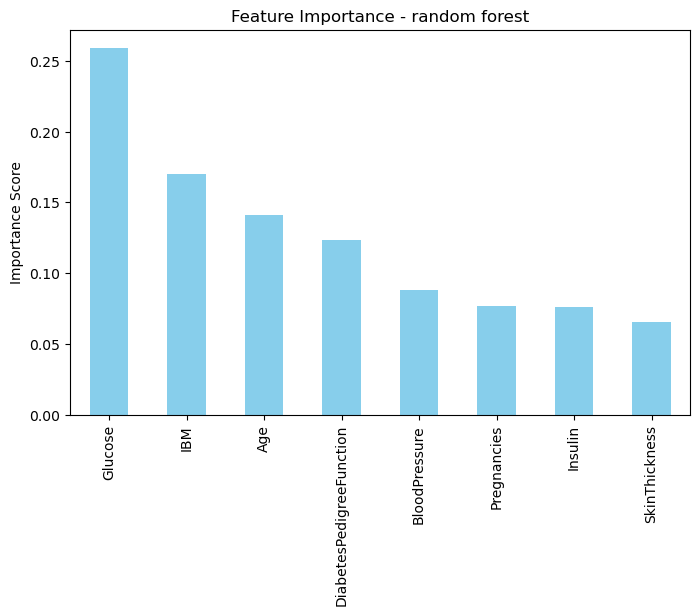

In [23]:
plt.figure(figsize = (8,5)) 
feat_importance.plot(kind = 'bar' , color = "skyblue" )
plt.title("Feature Importance - random forest") 
plt.ylabel("Importance Score" )
plt.show()